### Khai báo các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
from preprocess import TextPreprocessor
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression

# 1. Thống kê và phân tích dữ liệu

#### Đọc file dữ liệu đã thu thập


In [2]:
data = pd.read_csv(r"data/Data.csv")
data.sample(10)

Content         Label
69     Tại Công điện ngày 13/9, Thủ tướng Phạm Minh C...    Kinh doanh
16135  CMC Data Center Tân Thuận chính thức đạt được ...     Công nghệ
6319   "Bamboo" là bộ sưu tập tinh gọn, bao gồm cá...      Giải trí
10360                     Video: Interesting Engineering      Khoa học
16865  Hôm qua 30/8, Thái Lan được trao quyền đăng ca...      Thể thao
20140  Nội dung trên được Viện Kinh tế tài nguyên và ...  Bất động sản
14590  Việc hợp tác đào tạo giữa hai trường được ký k...     Công nghệ
2133   Sáng 24/9, Ngân hàng Nhà nước thay đổi giá bán...    Kinh doanh
2485   Làm sao để được dạy thêm tại nhà là điều khiến...      Giáo dục
15629  MobiFone là nhà mạng mới nhất tham gia vào cuộ...     Công nghệ

### Kích thước của dữ liệu

In [3]:
data.shape

(28626, 2)

### Thông tin cơ bản về dữ liệu

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28626 entries, 0 to 28625
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  28626 non-null  object
 1   Label    28626 non-null  object
dtypes: object(2)
memory usage: 447.4+ KB


### Thống kê số lượng mẫu trong mỗi nhãn

In [5]:
data['Label'].value_counts()

Label
Sức khỏe        2647
Công nghệ       2577
Khoa học        2554
Đời sống        2327
Thời sự         2278
Kinh doanh      2271
Giáo dục        2223
Giải trí        2212
Du lịch         2206
Thể thao        2205
Bất động sản    2060
Góc nhìn        1560
Pháp luật       1506
Name: count, dtype: int64

# 2. Tiền xử lý và làm sạch dữ liệu

### Tiền xử lý và tách từ trong tiếng Việt

In [6]:
X = data['Content']
y = data['Label']

In [7]:
preprocessor = TextPreprocessor(r"data/stopwords3.txt")
data = preprocessor.preprocess_data(data)

### Thực hiện mã hóa TF - IDF cho văn bản

In [8]:
tfidf_vect = TfidfVectorizer(analyzer='word')
tfidf_vect.fit(data['Content'])
X =  tfidf_vect.transform(X)

In [9]:
data

Content       Label
0      tập_đoàn novaland ( nvl ) vừa công_bố chậm trả...  Kinh doanh
1      trang_trại bò sữa hữu_cơ trang_trại nghệ_an tậ...  Kinh doanh
2      đồ_thị vn - index " mắc võng " mô_hình : sắc x...  Kinh doanh
3      lucas lee - tyson khai_thác sức_mạnh internet ...  Kinh doanh
4      hầu_hết thị_trường chứng_khoán châu á giao_dịc...  Kinh doanh
...                                                  ...         ...
28621  nửa_đêm , cảnh_sát cuộc_gọi trình_báo marina c...   Pháp luật
28622  , marlene warren , , trai tên joseph , , welli...   Pháp luật
28623  tối , tumd youqi , thành_phố bao , khu tự_trị ...   Pháp luật
28624  , alisa mathewson giật tỉnh_giấc phòng ngủ tối...   Pháp luật
28625  , tổng_đài cảnh_sát huyện mông thành , tỉnh an...   Pháp luật

[28626 rows x 2 columns]

### Thực hiện mã hóa Label Encoder cho nhãn của dữa liệu

In [10]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [11]:
y

array([7, 7, 7, ..., 8, 8, 8])

# 3. Trực quan hóa dữ liệu

### Trực quan hóa các từ phổ biến nhất trong văn bản theo các nhãn

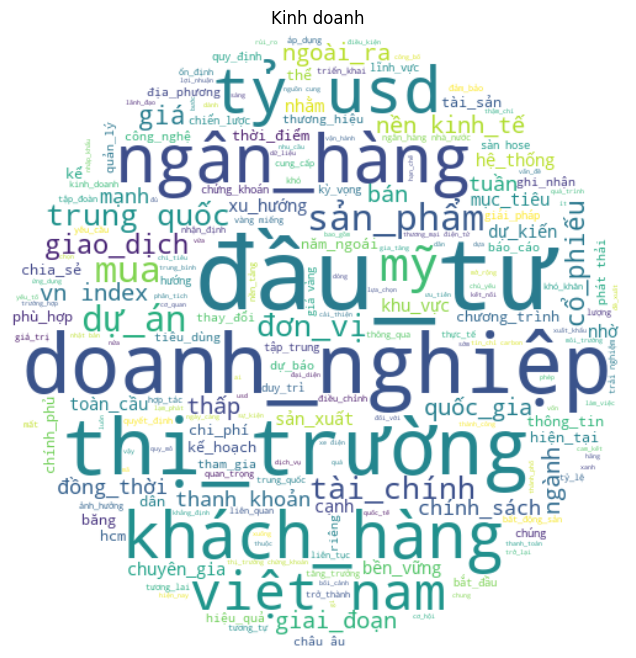

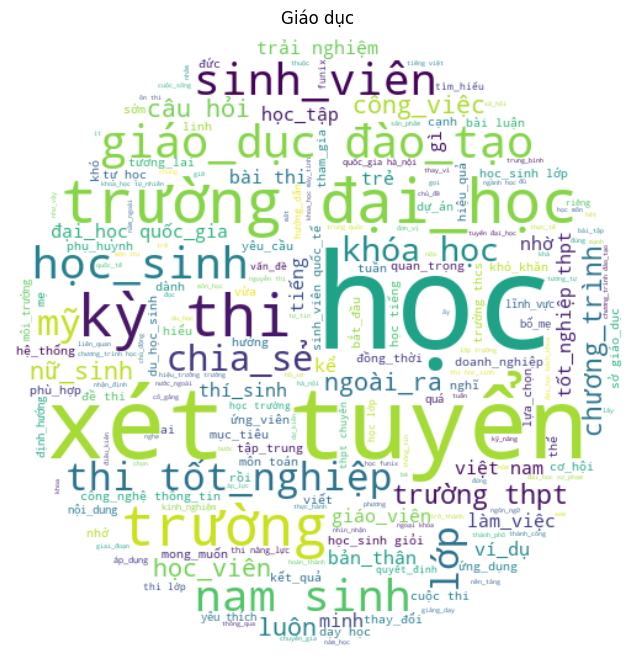

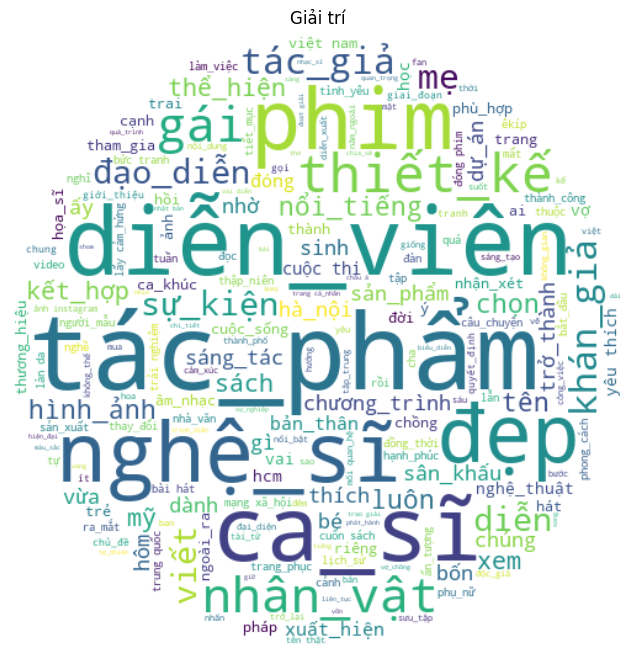

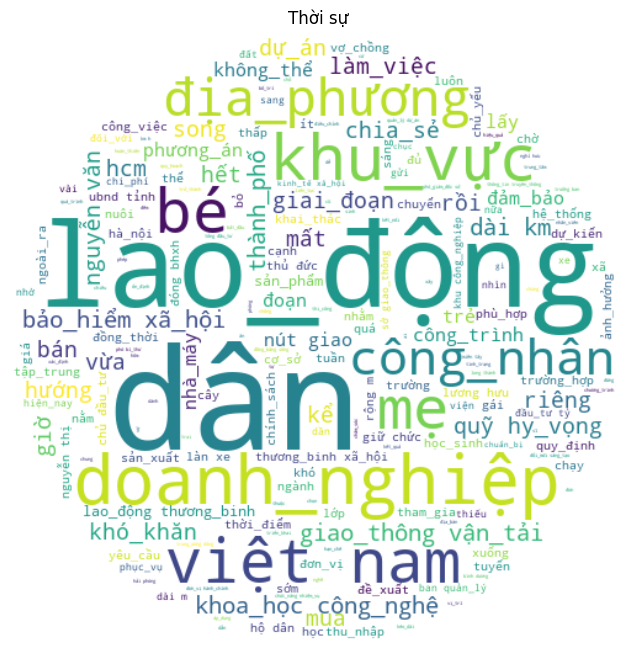

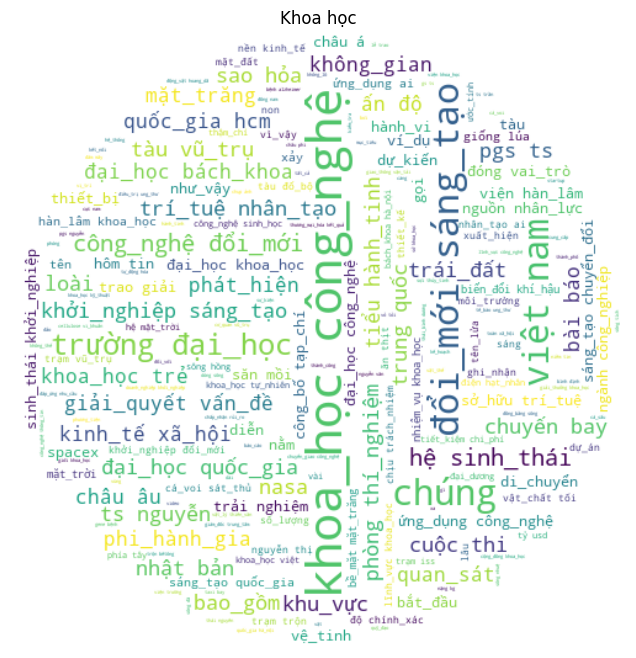

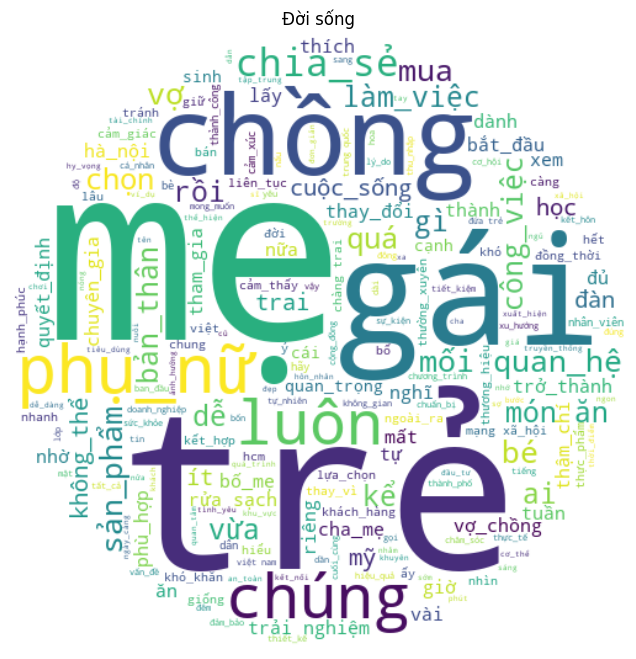

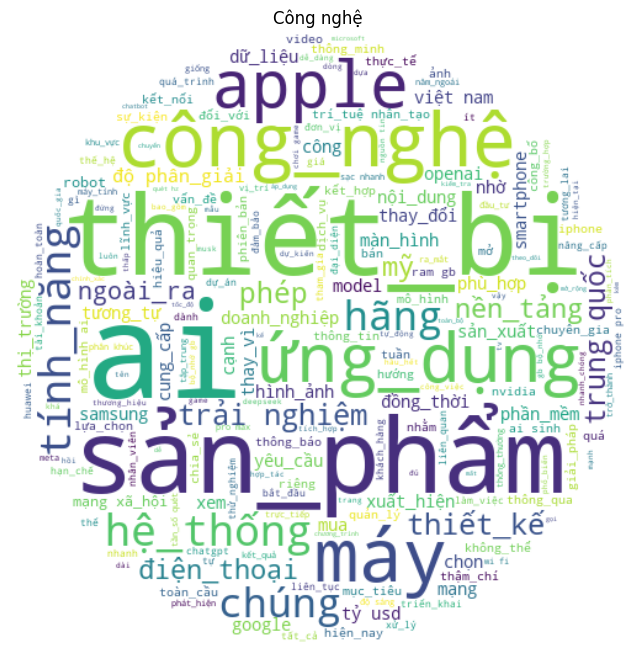

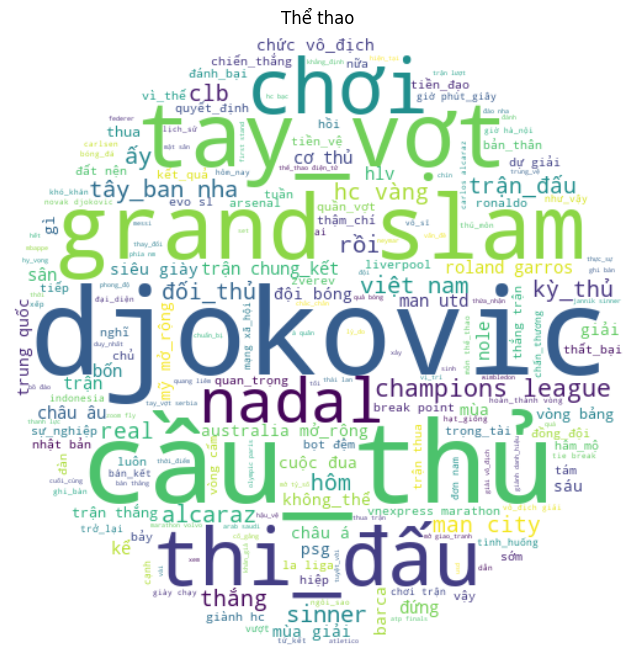

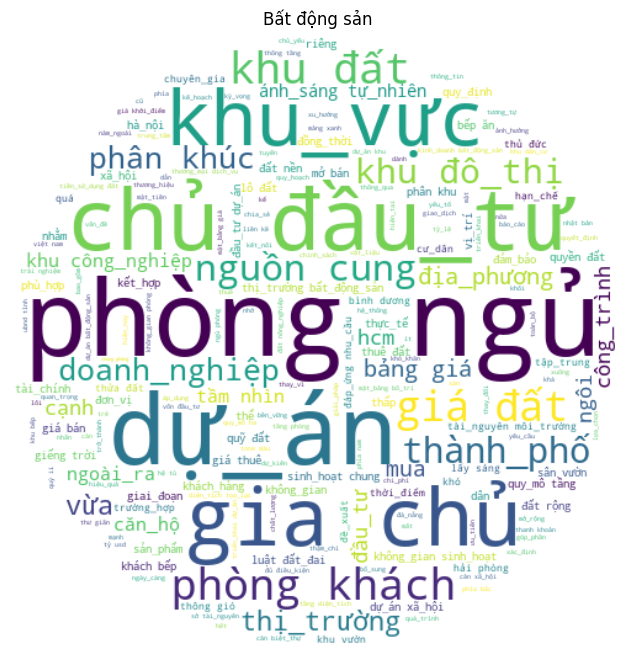

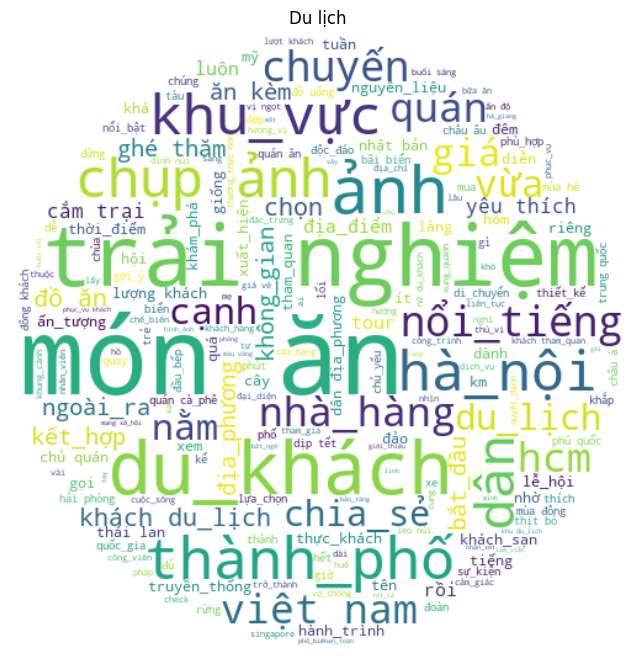

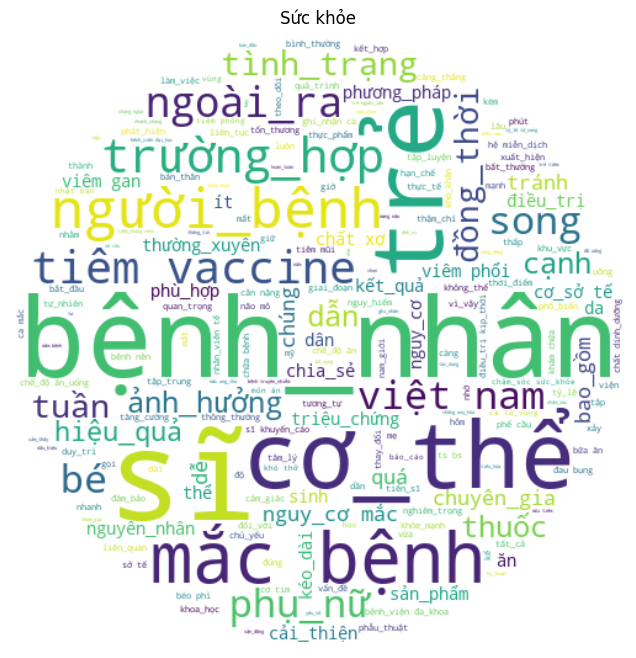

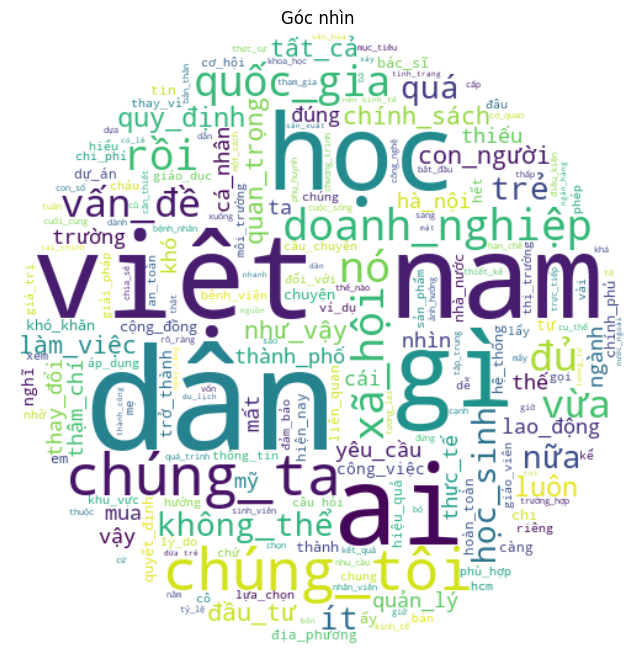

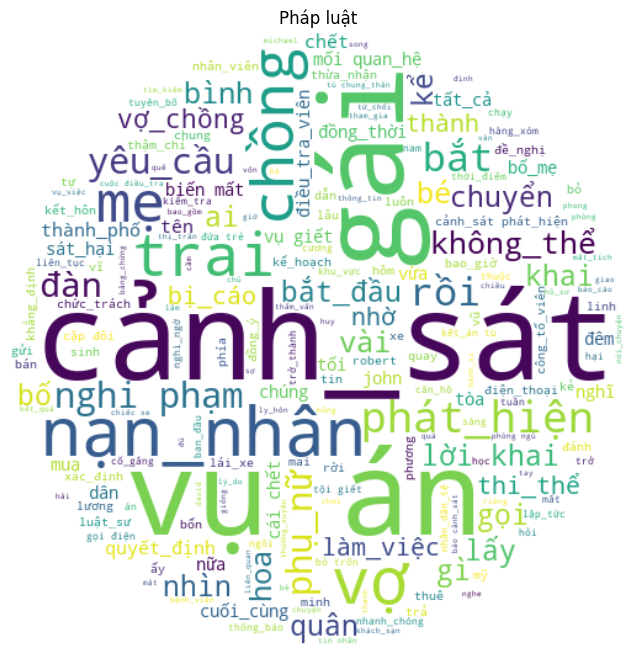

In [12]:
label = data['Label'].unique()
for i in range(len(label)):
    lb = label[i]
    size = (500, 500)
    mask = Image.new('RGB', size, (255, 255, 255))
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0, size[0], size[1]), fill=(0, 0, 0))
    mask.save(f"image/{lb}.png")
    df = data.loc[data['Label']==lb]
    label_counts = df.groupby('Label').size().reset_index(name='count')
    sorted_labels = label_counts.sort_values(by='count', ascending=False)
    sorted_data = df.merge(sorted_labels, on='Label')
    text = ' '.join(sorted_data['Content'])
    mask = np.array(Image.open(f"image/{lb}.png"))
    wc = WordCloud(background_color='white', contour_color='white', contour_width=1, mask=mask)
    wordcloud = wc.generate(text)
    wordcloud_image = wordcloud.to_image()
    rotated_wordcloud_image = wordcloud_image.rotate(360, expand=True)
    plt.figure(figsize=(8, 8))
    plt.imshow(rotated_wordcloud_image, interpolation='bilinear')
    plt.title(lb)
    plt.axis('off')
    plt.show()

### Trực quan hóa số lượng các mẫu theo nhãn

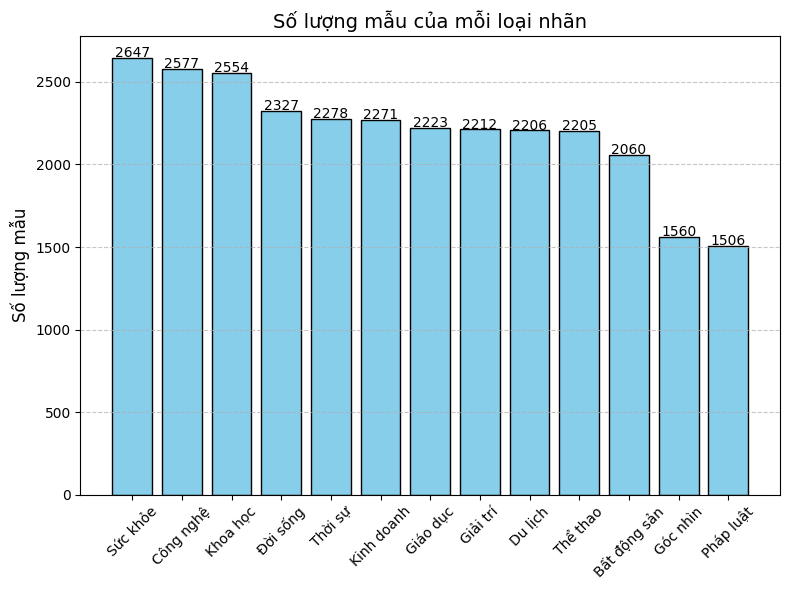

In [13]:
l = data['Label'].value_counts()
labels = l.index
sample_counts = l.values

plt.figure(figsize=(8, 6))
plt.bar(labels, sample_counts, color='skyblue', edgecolor='black')
plt.ylabel('Số lượng mẫu', fontsize=12)
plt.title('Số lượng mẫu của mỗi loại nhãn', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, count in enumerate(sample_counts):
    plt.text(i, count + 5, str(count), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


# 4 & 5. Phân chia dữ liệu, Huấn luyện mô hình, Đánh giá mô hình

#### Chia dữ liệu thành 2 tập train:test theo tỷ lệ 85:15

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)

### Mô hình Support Vector Machine

##### Huấn luyện mô hình

In [15]:
SVM = svm.SVC(kernel="sigmoid", C=1.25)
SVM.fit(X_train, y_train)

SVC(C=1.25, kernel='sigmoid')

In [16]:
y_pred_svm = SVM.predict(X_test)

In [17]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

precision = precision_score(y_test, y_pred_svm, average='macro')
print("Precision:", precision)

recall = recall_score(y_test, y_pred_svm, average='macro')  
print("Recall:", recall)

f1 = f1_score(y_test, y_pred_svm, average='macro')  
print("F1-score:", f1)


Accuracy: 0.8935724266418258
Precision: 0.8954795725830339
Recall: 0.8915774642482174
F1-score: 0.8927135030324791


In [18]:
def confusionMatrix(y_actual, pred):
    confusion_matrix(y_actual, pred)

    cm = confusion_matrix(y_actual, pred)

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()

    tick_marks = np.arange(13)
    plt.xticks(tick_marks, label_encoder.classes_, rotation = 90)
    plt.yticks(tick_marks, label_encoder.classes_, rotation = 0)

    thresh = cm.max() / 10.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

##### Ma trận nhầm lẫn

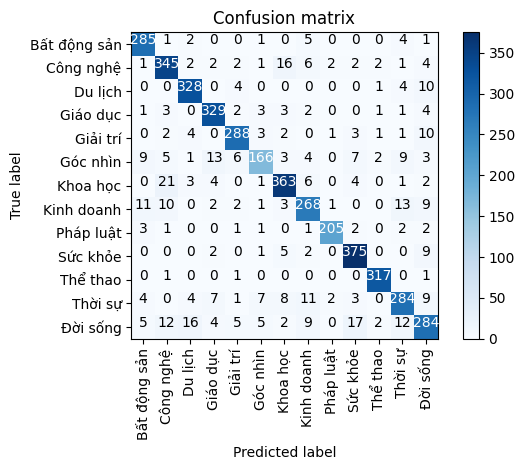

In [19]:
confusionMatrix(y_test, y_pred_svm)